In [1]:
#导入包
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
#载入数据
train_df = pd.read_csv('used_car_train_20200313.csv', sep=' ')
print(train_df.shape)

(150000, 31)


In [4]:
#数据总览-describe()
train_df.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [5]:
#数据总览-info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [10]:
# 训练集和测试集放在一起，一起观察
test = pd.read_csv('used_car_testA_20200313.csv', sep=' ')
train_df['train']=1
test['train']=0
df = pd.concat([train_df, test], ignore_index=True, sort=False)

<Figure size 432x288 with 0 Axes>

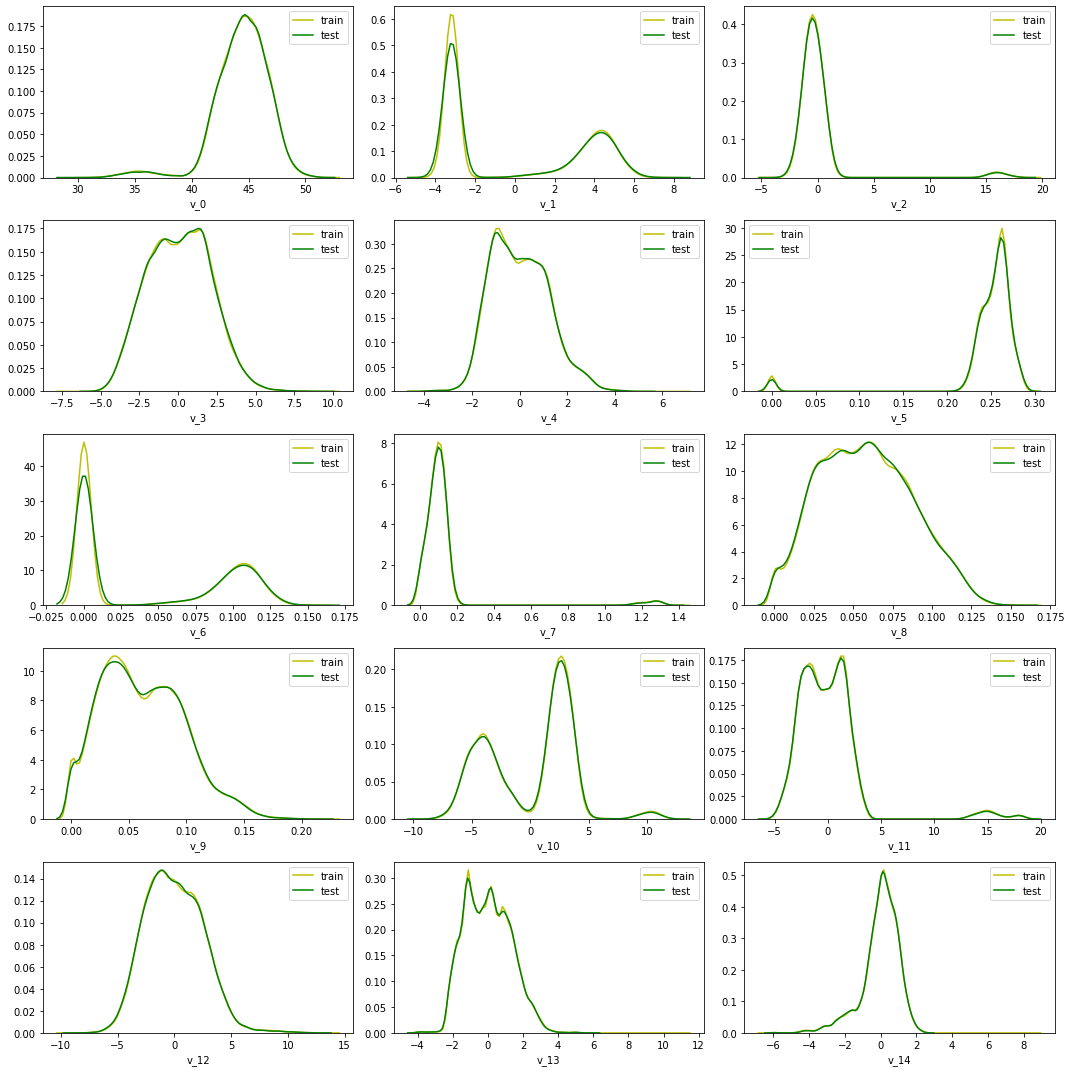

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#数据类型分类
date_cols = ['regDate', 'creatDate']
cate_cols = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', 'seller', 'offerType']
num_cols = ['power', 'kilometer'] + ['v_{}'.format(i) for i in range(15)]
#观察训练集和测试集的分布
plt.figure()
plt.figure(figsize=(15, 15))
i = 1
for f in num_cols[2:]:
    plt.subplot(5, 3, i)
    i += 1
    sns.distplot(df[df['train']==1][f], label='train', color='y', hist=False)
    sns.distplot(df[df['train']==0][f], label='test', color='g', hist=False)
plt.tight_layout()
plt.show()

训练集和测试集的特征分布差不多，如果分布不一致，需要将训练集特征的分布往测试集上靠。

In [13]:
#数据统计-缺失值，最大值
cols = date_cols + cate_cols + num_cols
tmp = pd.DataFrame()
tmp['count'] = df[cols].count().values
tmp['missing_rate'] = (df.shape[0] - tmp['count']) / df.shape[0]
tmp['nunique'] = df[cols].nunique().values
tmp['max_value_counts'] = [df[f].value_counts().values[0] for f in cols]
tmp['max_value_counts_prop'] = tmp['max_value_counts'] / df.shape[0]
tmp['max_value_counts_value'] = [df[f].value_counts().index[0] for f in cols]
tmp.index = cols
tmp

,count,missing_rate,nunique,max_value_counts,max_value_counts_prop,max_value_counts_value
regDate,200000,0.000000,3900,228,0.001140,20000008
creatDate,200000,0.000000,101,7814,0.039070,20160403
name,200000,0.000000,128466,378,0.001890,708
model,199999,0.000005,248,15658,0.078290,0
brand,200000,0.000000,40,41828,0.209140,0
bodyType,194081,0.029595,8,55405,0.277025,0
fuelType,188427,0.057865,7,122312,0.611560,0
gearbox,192109,0.039455,2,148924,0.744620,0
notRepairedDamage,200000,0.000000,3,148610,0.743050,0.0
regionCode,200000,0.000000,8021,515,0.002575,419


In [14]:
##查看每列的存在nan情况
train_df.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
train                   0
dtype: int64

In [15]:
test.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
train                   0
dtype: int64

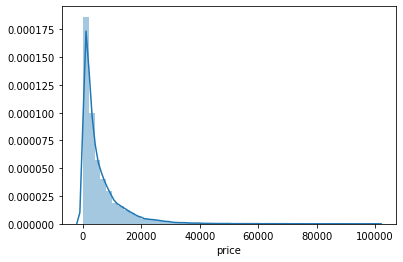

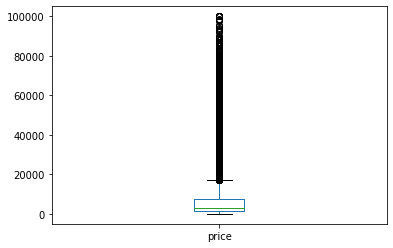

In [16]:
# 观察预测值的分布
plt.figure()
sns.distplot(train_df['price'])
plt.figure()
train_df['price'].plot.box()
plt.show()

价格不服从正态分布，所以在进行回归之前，它必须进行转换。可以使用对数变换。

In [17]:
#查看数据的偏度和峰度
train_df.skew(), train_df.kurt()

(SaleID          0.000000
 name            0.557606
 regDate         0.028495
 model           1.484388
 brand           1.150760
 bodyType        0.991530
 fuelType        1.595486
 gearbox         1.317514
 power          65.863178
 kilometer      -1.525921
 regionCode      0.688881
 seller        387.298335
 offerType       0.000000
 creatDate     -79.013310
 price           3.346487
 v_0            -1.316712
 v_1             0.359454
 v_2             4.842556
 v_3             0.106292
 v_4             0.367989
 v_5            -4.737094
 v_6             0.368073
 v_7             5.130233
 v_8             0.204613
 v_9             0.419501
 v_10            0.025220
 v_11            3.029146
 v_12            0.365358
 v_13            0.267915
 v_14           -1.186355
 train           0.000000
 dtype: float64,
 SaleID            -1.200000
 name              -1.039945
 regDate           -0.697308
 model              1.740483
 brand              1.076201
 bodyType           0.206937
 fu

In [18]:
#连续数值特征分析
# 特征nunique分布
for cat_fea in num_cols:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, train_df[cat_fea].nunique()))
    print(train_df[cat_fea].value_counts())

power的特征分布如下：
power特征有个566不同的值
0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1597        1
1596        1
572         1
316         1
575         1
Name: power, Length: 566, dtype: int64
kilometer的特征分布如下：
kilometer特征有个13不同的值
15.0    96877
12.5    15722
10.0     6459
9.0      5257
8.0      4573
7.0      4084
6.0      3725
5.0      3144
4.0      2718
3.0      2501
2.0      2354
0.5      1840
1.0       746
Name: kilometer, dtype: int64
v_0的特征分布如下：
v_0特征有个143997不同的值
45.349115    20
48.087217    16
47.568450    15
48.618150    15
47.840357    15
             ..
44.752849     1
47.710369     1
45.626634     1
43.795918     1
42.340691     1
Name: v_0, Length: 143997, dtype: int64
v_1的特征分布如下：
v_1特征有个143998不同的值
-3.245133    20
 3.183323    16
 1.942732    15
 3.354949    15
 2.796739    15
             ..
 3.418050     1
-2.994782     1
-3.022811     1
-3.220458     1
-3.309574     1
Name: v_1, Length: 143998, dtype: int64
v_2的特征分布如下：
v_2特征有个143997不同的值
-0.3

In [19]:
num_cols.append('price')

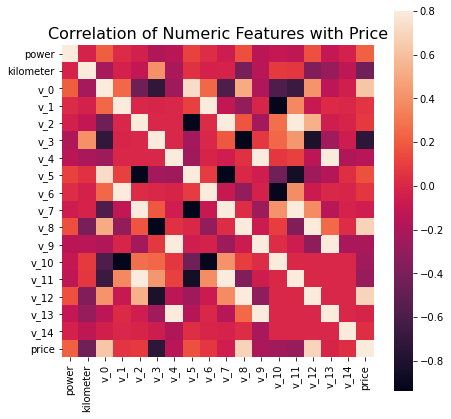

In [23]:
## 1) 相关性分析
price_numeric = train_df[num_cols]
correlation = price_numeric.corr()
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [25]:
## 2) 查看几个特征得 偏度和峰值
for col in num_cols:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_df[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


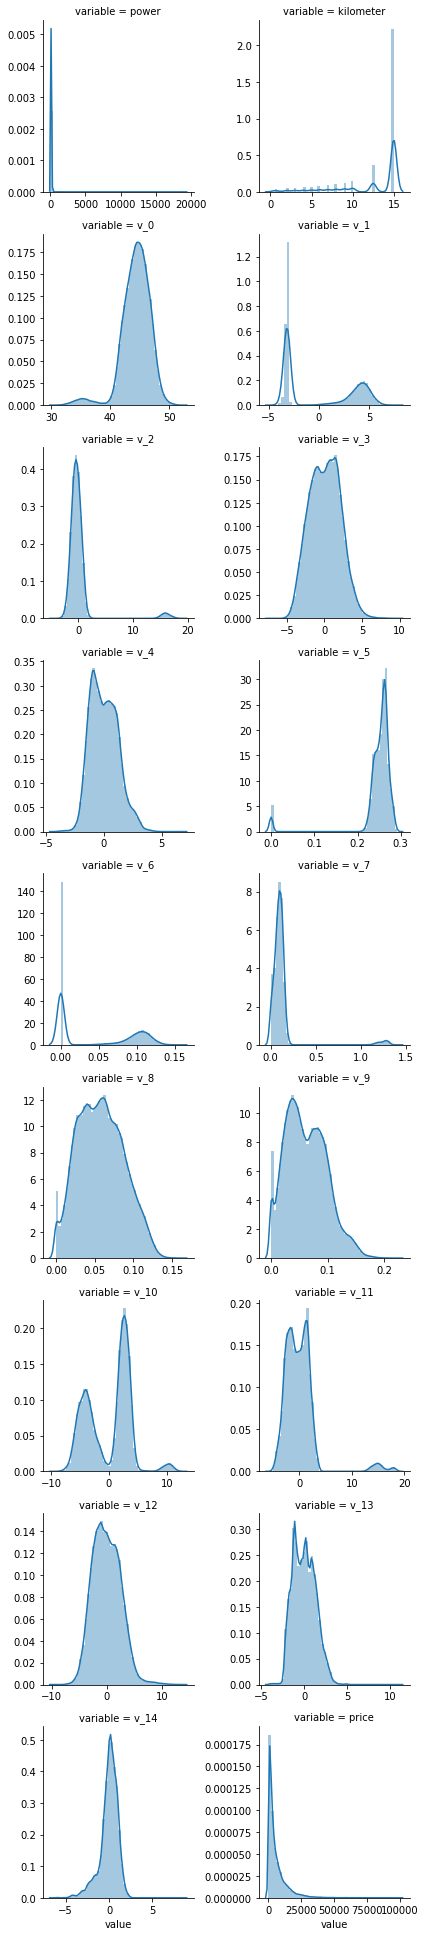

In [27]:
## 3) 每个数字特征得分布可视化
f = pd.melt(train_df, value_vars=num_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

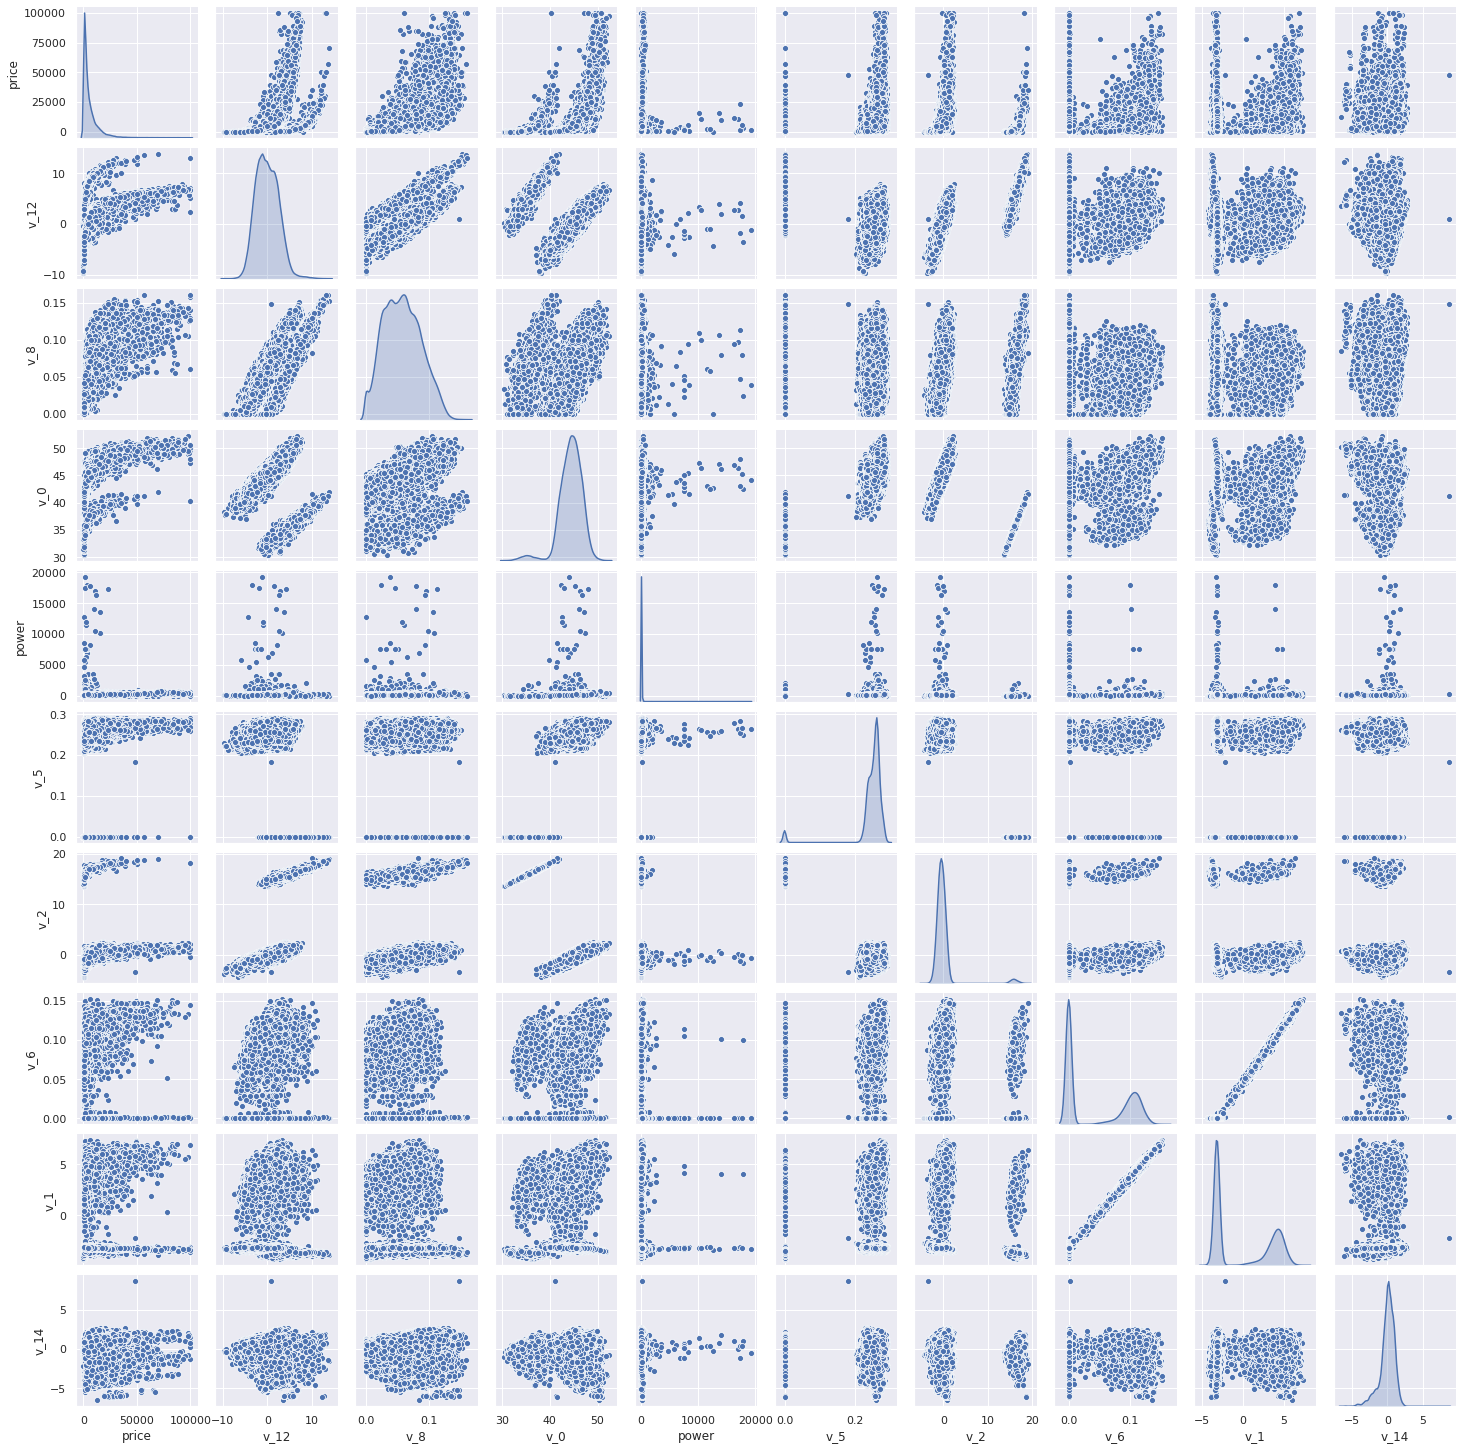

In [28]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train_df[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

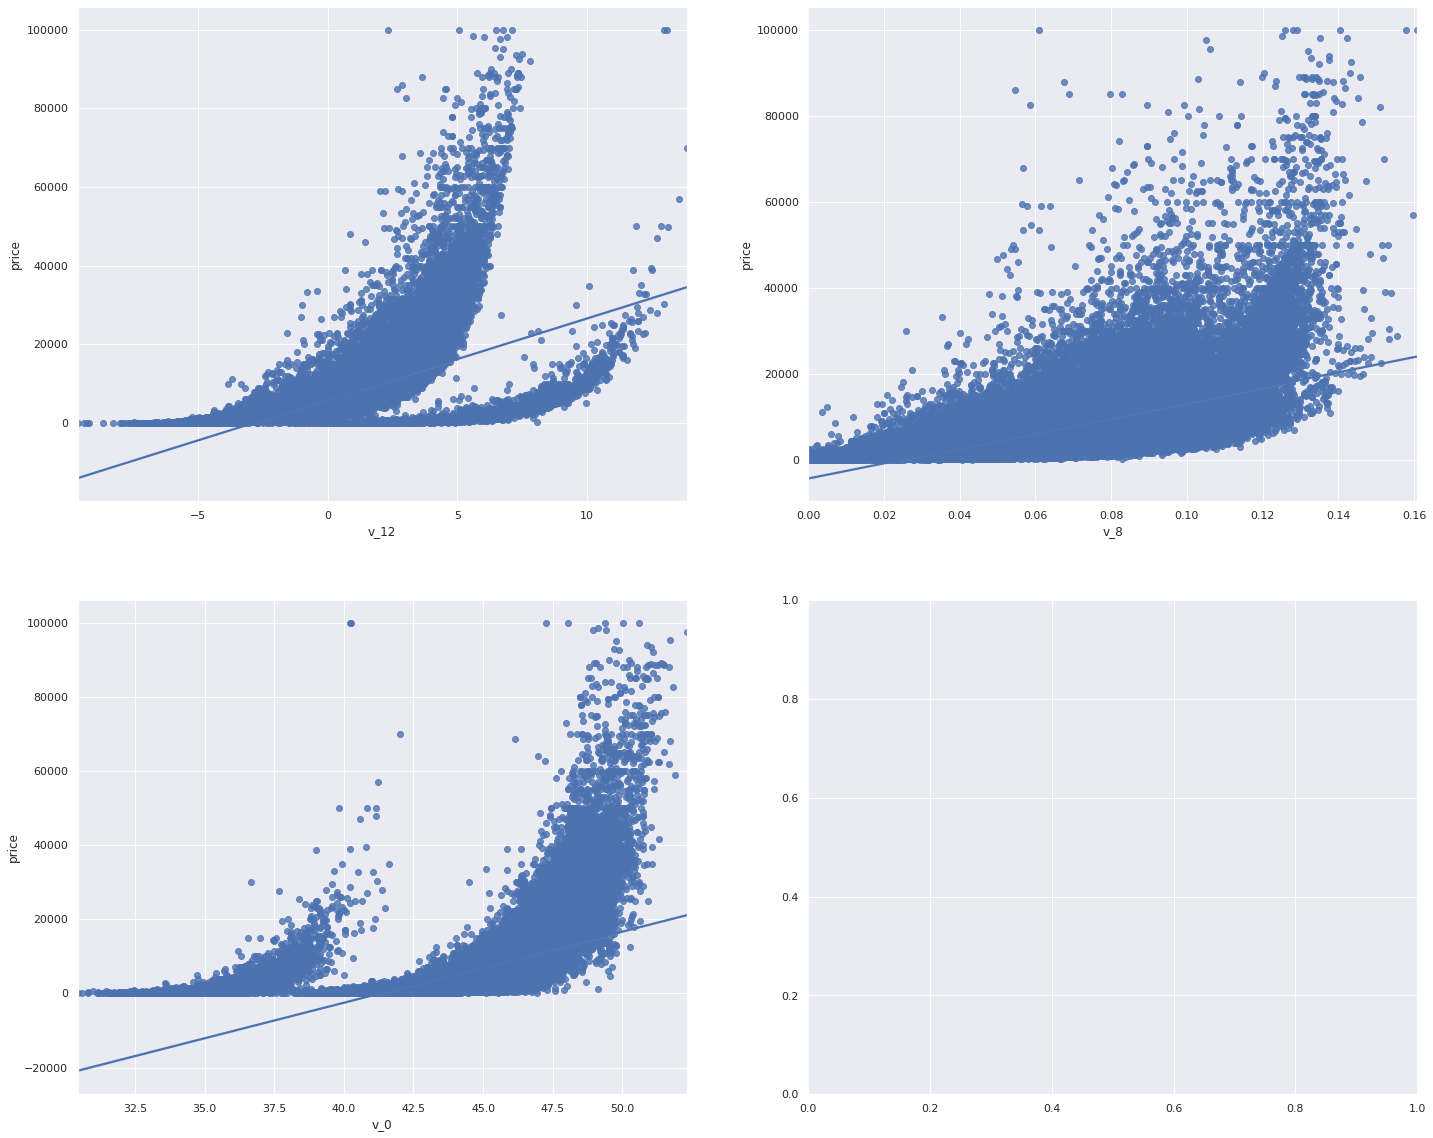

In [31]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([train_df['price'],train_df['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([train_df['price'],train_df['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([train_df['price'],train_df['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

In [35]:
#类别特征分析
## 1) unique分布
for fea in cate_cols:
    print(fea + ": " + str(train_df[fea].nunique()))

name: 99662
model: 248
brand: 40
bodyType: 8
fuelType: 7
gearbox: 2
notRepairedDamage: 3
regionCode: 7905
seller: 2
offerType: 1


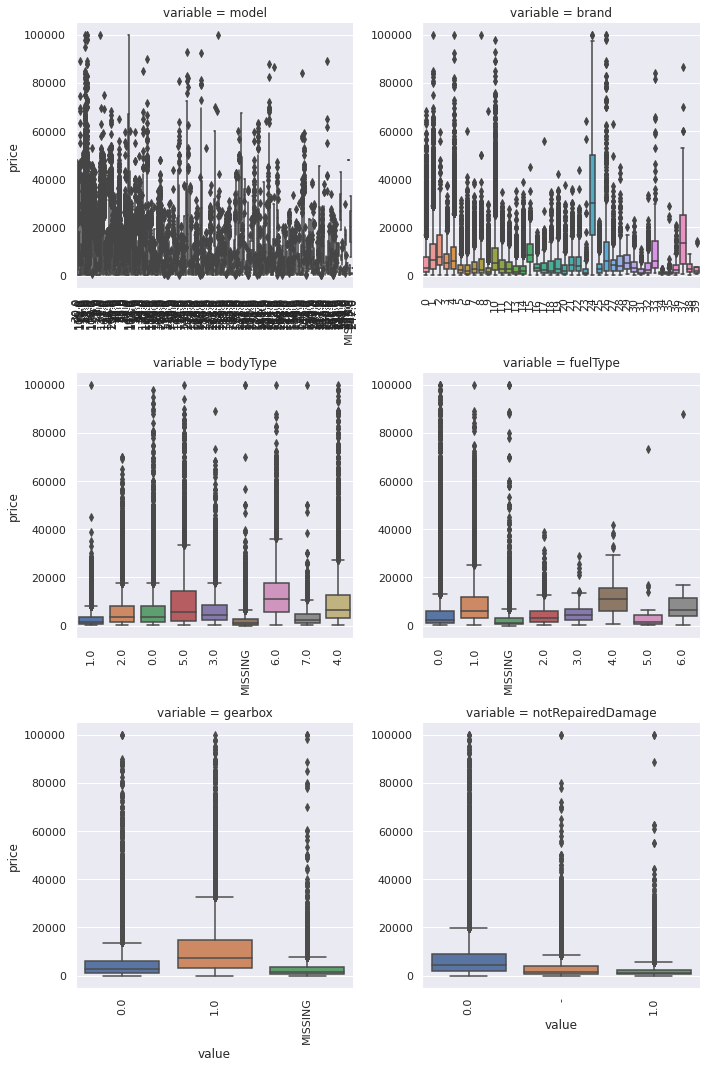

In [36]:
## 2) 类别特征箱形图可视化

# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    train_df[c] = train_df[c].astype('category')
    if train_df[c].isnull().any():
        train_df[c] = train_df[c].cat.add_categories(['MISSING'])
        train_df[c] = train_df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_df, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

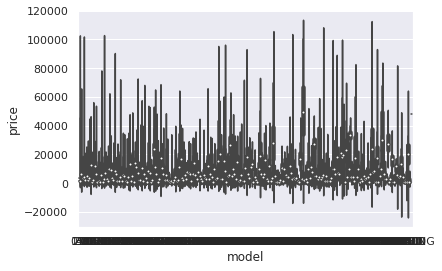

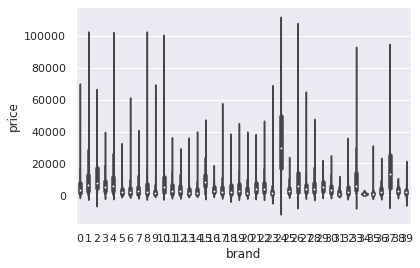

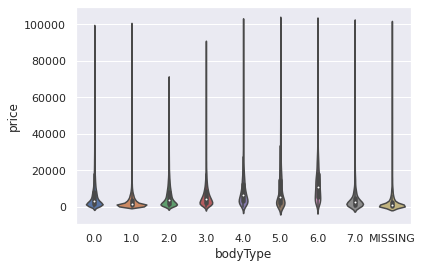

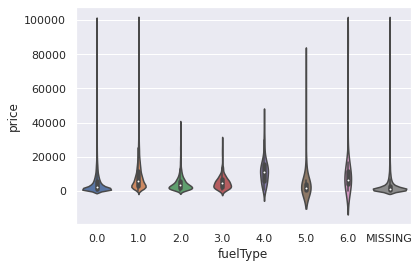

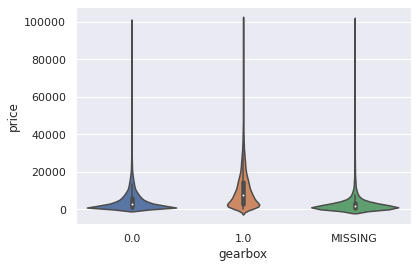

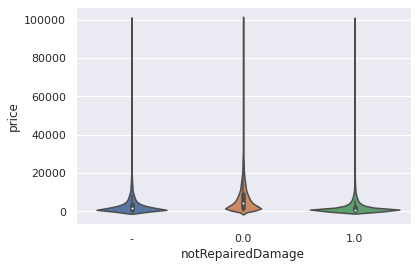

In [37]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=train_df)
    plt.show()

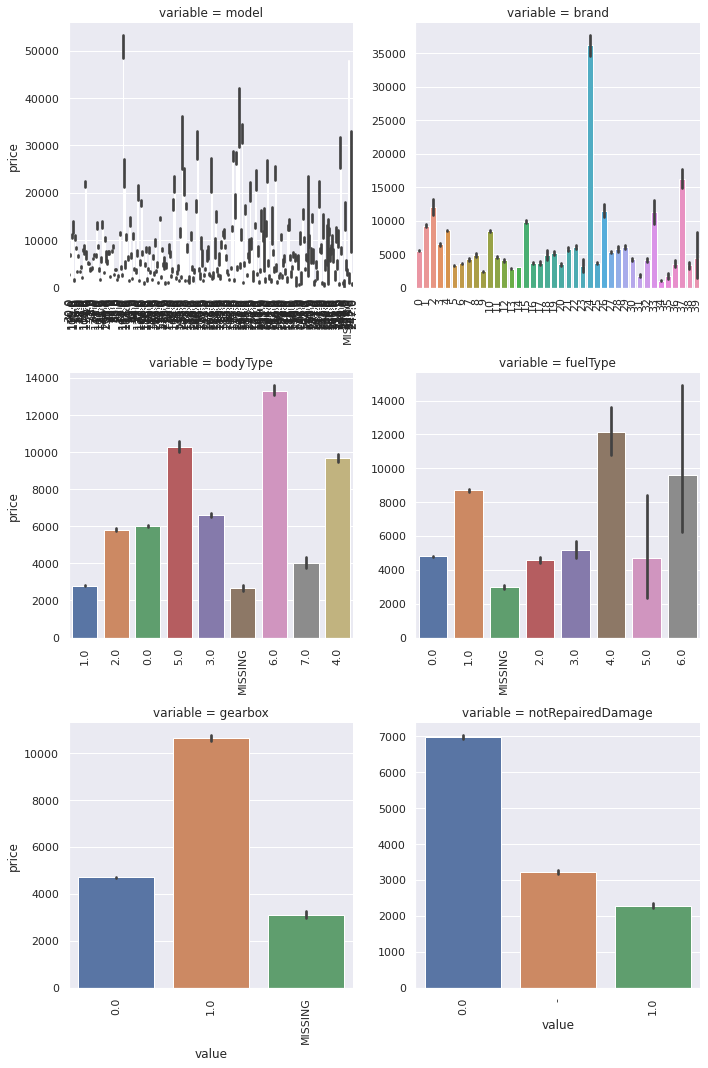

In [38]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_df, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

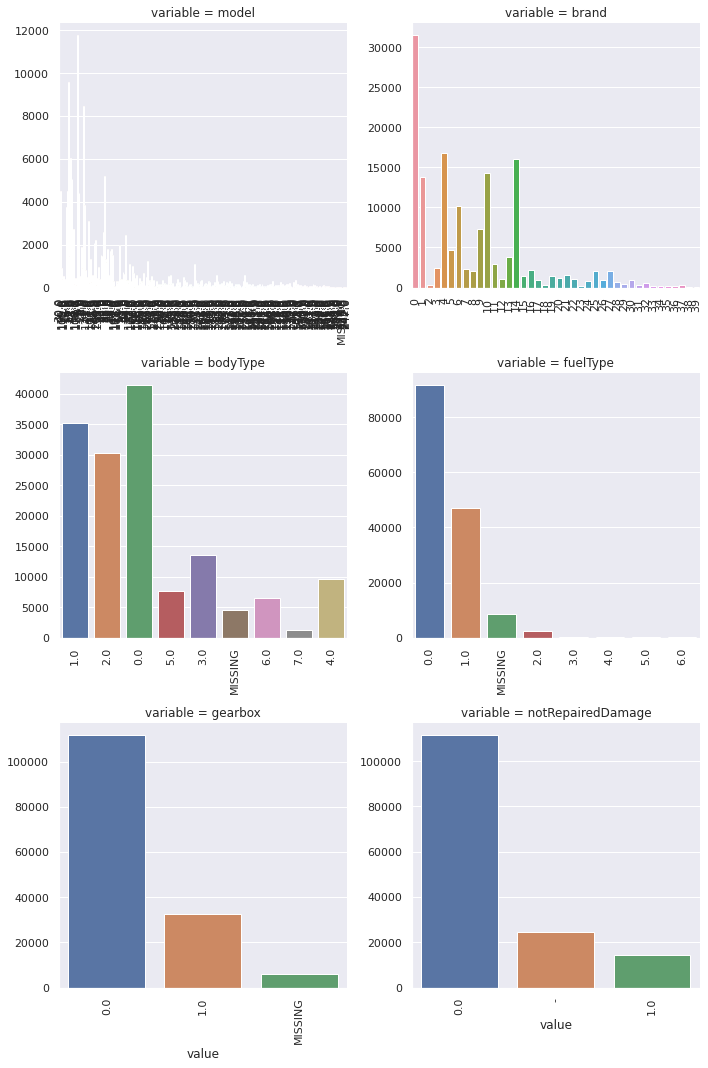

In [39]:
##  5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(train_df,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")
